In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train, validation, test = load_mnist()
X_train, y_train = train
X_test, y_test = test

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


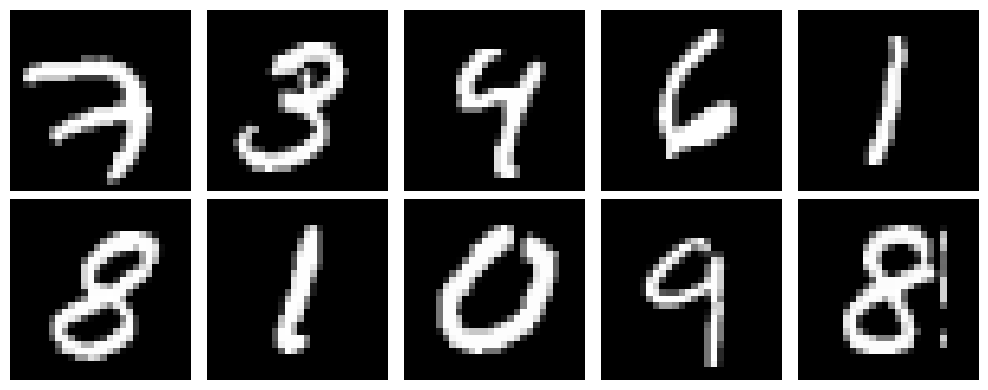

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()
for i in range(10):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Алгоритм PCA

In [4]:
class my_PCA():
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.eigenvectors = None
        self.eigenvalues = None
    def fit(self, X):
        self.mean=np.mean(X)
        centered_X=X-self.mean
        cov_matrix=np.cov(centered_X, rowvar=False)
        self.eigenvalues, self.eigenvectors=np.linalg.eig(cov_matrix)

        idx = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:, idx]
    def transform(self, X):
        centered_X=X-self.mean
        if self.n_components != None:
            reduced_eigenvectors=self.eigenvectors[:, :self.n_components]
            return np.dot(centered_X, reduced_eigenvectors)
        else:
            return np.dot(centered_X, self.eigenvectors)
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [6]:
pca = my_PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

C:\Users\princ\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


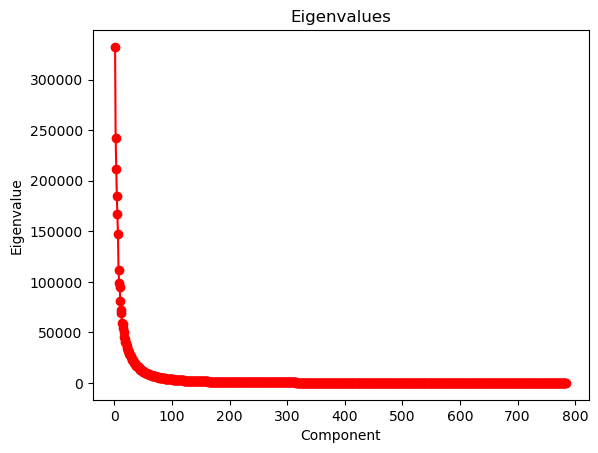

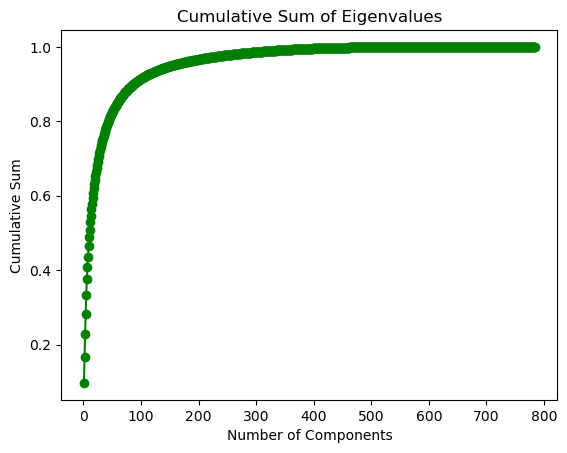

C:\Users\princ\anaconda3\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


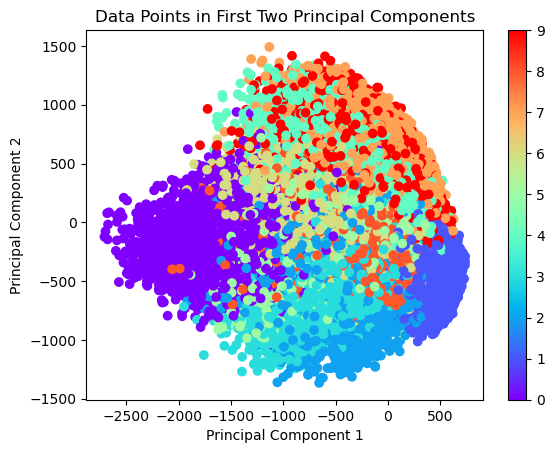

In [7]:
# График собственных значений
plt.plot(np.arange(1, 785), pca.eigenvalues, marker='o', linestyle='-', color='r')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues')
plt.show()

# График кумулятивной суммы собственных значений
cumulative_sum = np.cumsum(pca.eigenvalues) / np.sum(pca.eigenvalues)
plt.plot(np.arange(1, 785), cumulative_sum, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum of Eigenvalues')
plt.show()

# Изображение точек датасета в первых двух координатах главных компонент
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points in First Two Principal Components')
plt.colorbar()
plt.show()

In [8]:
class my_kNN():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = []
        for test_sample in X_test:
            distances = []
            for train_sample in self.X_train:
                distance = np.linalg.norm(train_sample - test_sample)
                distances.append(distance)
            indices = np.argsort(distances)
            k_indices = indices[:self.n_neighbors]
            k_nearest_labels = self.y_train[k_indices]
            pred_label = np.argmax(np.bincount(k_nearest_labels))
            y_pred.append(pred_label)
        return np.array(y_pred)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42)


In [10]:
knn = my_kNN(n_neighbors=5)
knn.fit(X_train, y_train)

In [11]:
y_pred = knn.predict(X_val)

KeyboardInterrupt: 

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

In [ ]:

# Поиск оптимальных параметров для алгоритма с использованием метода главных компонент
best_accuracy = 0
best_n_neighbors = 0
best_n_components = 0
for n_neighbors in range(1, 31):
    for n_components in range(1, X_train.shape[1]+1):
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_pca, y_train)
        y_pred = knn.predict(X_test_pca)

        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_neighbors = n_neighbors
            best_n_components = n_components

print("Best accuracy:", best_accuracy)
print("Best number of neighbors:", best_n_neighbors)
print("Best number of components:", best_n_components)
